In [3]:
# Load the data. 

import pandas as pd
import numpy as np

import pandas as pd

df = pd.read_csv('./Downloads/TestData.csv')

In [4]:
df.describe()

,Height,Weight,BMI,AbdominalCircumference,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrinePH,Leukocyte,RedBloodCells,...,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID,Label
count,191.000000,188.000000,169.000000,127.000000,57.000000,91.000000,116.000000,133.000000,91.000000,195.000000,...,145.000000,85.000000,59.000000,77.000000,51.000000,93.000000,108.000000,94.000000,9.970000e+02,997.000000
mean,169.454450,73.289617,24.951006,83.620551,3.159123,77.084615,112.159483,5.385602,6003.021978,437.353846,...,99.162759,98.524706,20.091695,24.645455,3.056863,2.026882,1.069843,2.186170,4.018053e+06,1.118355
std,8.505043,46.492055,6.897452,16.046830,1.989713,16.895245,29.162597,2.156957,2791.484862,169.228763,...,30.477681,25.262375,8.998808,14.492244,2.241183,2.277114,0.691358,2.867939,1.521438e+04,1.175398
min,119.000000,20.000000,13.500000,35.000000,1.000000,21.000000,33.000000,1.100000,100.000000,52.000000,...,30.000000,28.000000,3.000000,8.100000,1.000000,0.100000,0.005000,0.100000,3.956543e+06,0.000000
25%,164.600000,57.375000,21.500000,81.000000,1.000000,69.000000,100.750000,4.000000,4845.000000,435.000000,...,86.000000,87.600000,14.950000,11.000000,1.000000,0.900000,0.619750,0.700000,4.012759e+06,0.000000
50%,169.800000,64.950000,24.100000,84.900000,3.500000,80.000000,121.000000,5.000000,6100.000000,479.000000,...,93.000000,96.000000,20.800000,20.600000,2.500000,1.000000,1.000000,1.000000,4.015578e+06,1.000000
75%,174.600000,75.050000,26.000000,85.255000,4.220000,84.000000,130.000000,6.000000,7235.000000,521.500000,...,102.000000,102.000000,26.400000,36.100000,4.000000,2.000000,1.047500,1.875000,4.032453e+06,2.000000
max,190.000000,480.000000,58.000000,185.000000,8.000000,147.000000,174.000000,15.000000,18370.000000,1422.000000,...,336.000000,184.000000,53.000000,71.000000,11.000000,13.000000,3.000000,12.000000,4.037800e+06,3.000000


In [175]:
print("Rows in the data: {} \nColumns in data: {}".format(df.shape[0],df.shape[1]))

Rows in the data: 1994 
Columns in data: 55


In [6]:
dfc = df.copy() # Make a copy of the data. 
dfc['Label'].value_counts() # Evaluate different types of Labels. 

0.0    458
2.0    220
3.0    178
1.0    141
Name: Label, dtype: int64

# 1. Cleaning & preparation of the dataset. 

In [7]:
# A simple program to deal with missing data. 

def missing_data(data):
    print("The total missing data is {} while max missing data is: {}".format(
        data.isnull().sum().sum(),data.isnull().sum().max()))
    print("Dropping rows with missing values in all columns")
    data2 = data.dropna(how='all',axis=0)
    print("Number of rows in cleaned data", data2.shape[0])
    return data2



def clean_data(data):
    # Drop the duplicate rows
    data1 = data.drop_duplicates()
    print("Deleting duplicate rows and rows with missing Label")
    # Drop the missing values ""
    for c in list(data1.columns.values):
        data1.replace('', np.nan, inplace=True)
    # As we are interestd in 'Labels', drop the rows where its NaN.
    data1 = data1.dropna(subset=['Label'],axis=0)
    #print("Number of rows:", data1.shape[0])
    return data1

In [8]:
# Calling the above functions.
dfc = missing_data(dfc)

The total missing data is 99828 while max missing data is: 1943
Dropping rows with missing values in all columns
Number of rows in cleaned data 997


In [9]:
dfc = clean_data(dfc)

Deleting duplicate rows and rows with missing Label


## Dealing with missing values. 

**Remarks:**  
    1) Sevral columns have high percentage of NaN values.  
    2) So they carry little information and need to be deleted.  
    3) As in general Variance is more important than missing values,  
       we start with deleting colums with more than 85% of missing values

In [10]:
# Deleting columns with over 85% of missing data. 

def del_col(data):
    for c in list(data.columns.values):
        if data[c].isnull().sum() > 0.85*(data.shape[0]):
            data = data.drop(c,axis=1)
    print("The number of colums remaining",data.shape[1])
    return data
    
dfc = del_col(dfc)

The number of colums remaining 22


In [11]:
print('Percentage of missing values in the present data',
       100*dfc.isnull().sum().sum()/(dfc.shape[0]*dfc.shape[1]))

Percentage of missing values in the present data 70.00091182638826


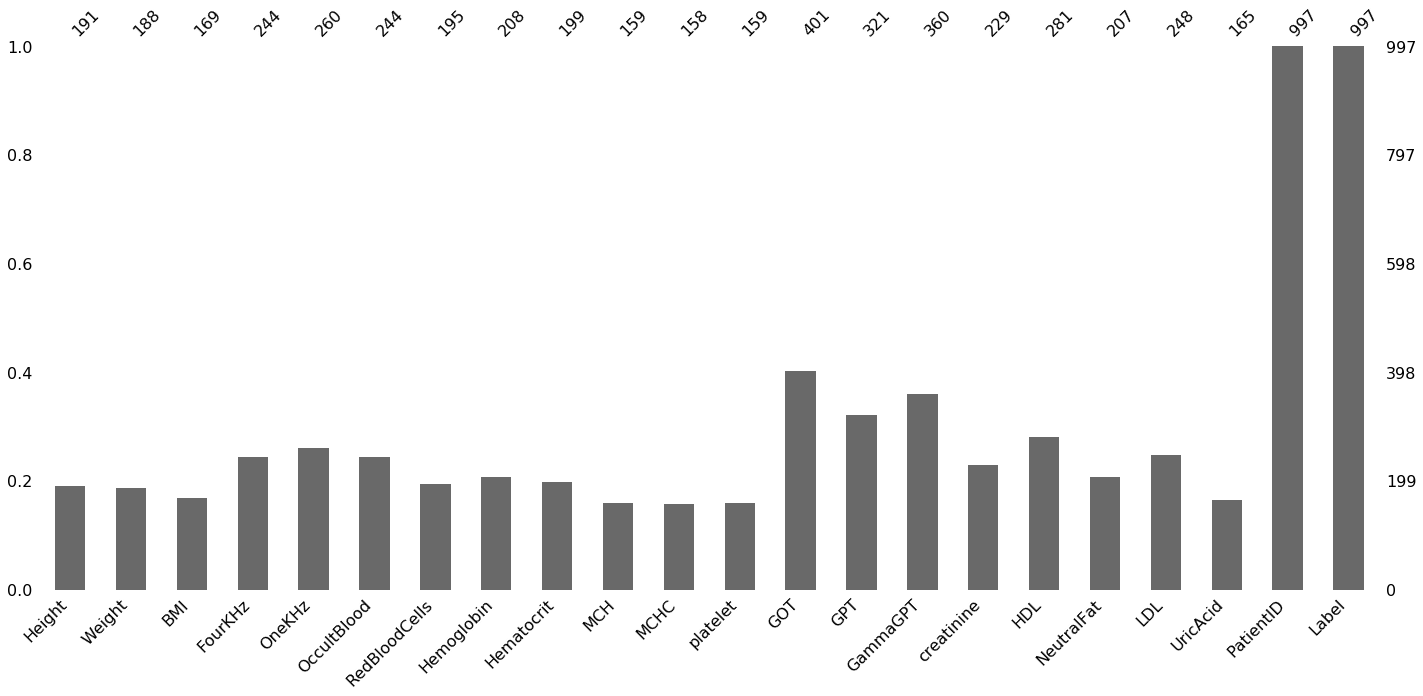

In [12]:
# Plotting column wise nulity that displays data-density display

# To do this we use the 'missingno' package.

import matplotlib
import missingno as msno
%matplotlib inline

msno.bar(dfc)

- The above chart indicates that the distribution of nullity is approximately uniform.  
- Data density is maximum for 'Label' and 'PatientID' whereas it is minimum  
  for 'MCH' and 'MCHC'.

**Nullity correlation:**

- It is also important to understand the relationship between nullity of one 
  column with another.  
  
- A good measure of this relationship is 'nullity correlation', which measures pairwise  
  nullity.  
  
- However, pairwise relationship is limited so we instead study a 'Dendrogram'. This uses  
  hierarchical clustering algorithm to bin variables against their nullity correlation. 

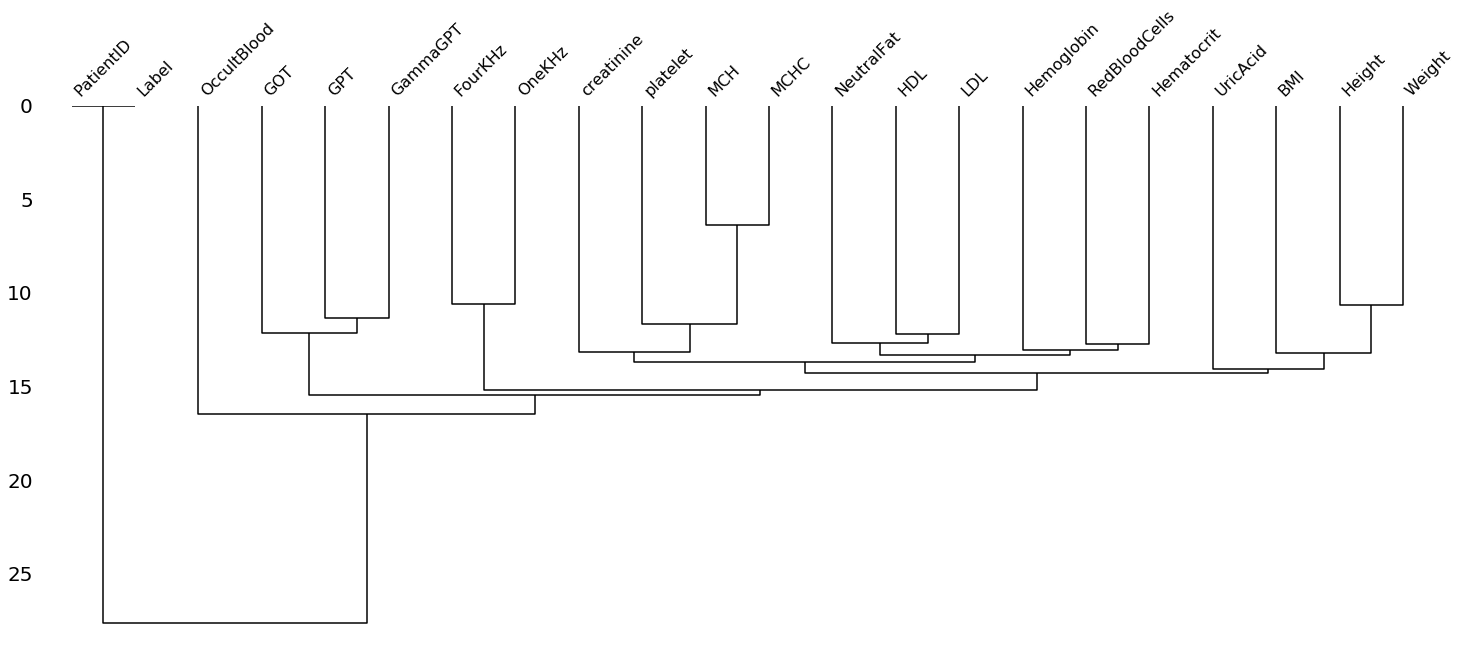

In [12]:
msno.dendrogram(dfc)

**Remarks**:
- The map should be read from the top. It pairs features based on their nullity correlation.  
- The more monotone the set of variables, the closer their distance to zero.  
- Cluster leaves which split close to zero, predict each other very well. In our case this  
  can be seen for instance in case of (MCH, MCHC) and (Height, Weight).  
- It will be interesting to contrast this with correlation heat map, which would require  
  filling-in the missig values though. We consdier this problem below. 

**Assumptions**:  

- We assume here that the data is _Missing at Random_ but _not_ necessarily  
  missing completely at random.  
- Given that most of the data is missing, and the conditional dependence of the missing  
  values in nullity-correlated variables, this is a fair assumption to make. 

In [13]:
# Consdiering a patient with weight 480 as an outlier, we remove that row.

dfc = dfc.drop(1361) 

- To handle missing data, we use MICE - Multiple Imutation by Chained Equations.  

In [14]:
# Before we consdier imputation, which requires numerical values, 
# categorical variables needs to be addressed. 
# Find all the categorical variables so they could be analysed differetly. 

cols = dfc.columns
num_cols = dfc._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
print("categorical features: \n", cat_cols)

# Print unique vlaues and their counts in categorical columns. 
print("Unique value counts in categorical columns \n")
for c in cat_cols:
    print(dfc[c].value_counts())

categorical features: 
 ['OccultBlood', 'OneKHz', 'FourKHz']
Unique value counts in categorical columns 

one     178
zero     65
Name: OccultBlood, dtype: int64
one     166
zero     93
Name: OneKHz, dtype: int64
one     148
zero     95
Name: FourKHz, dtype: int64


In [15]:
# Tranfom the categorical variables in the following way:

def transform_cat(df):
    E_vals = {'one':1,'zero':0} # Values for column 'E'
    for c in cat_cols:
        df[c] = df[c].map(E_vals)
    return df  
dfc = transform_cat(dfc)

In [16]:
dfc.head()

,Height,Weight,BMI,FourKHz,OneKHz,OccultBlood,RedBloodCells,Hemoglobin,Hematocrit,MCH,...,GOT,GPT,GammaGPT,creatinine,HDL,NeutralFat,LDL,UricAcid,PatientID,Label
1,168.1,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,18.0,17.0,34.0,NaN,NaN,NaN,NaN,NaN,3956543.0,0.0
3,172.1,65.7,22.0,1.0,1.0,1.0,482.0,13.0,45.5,30.7,...,12.0,12.0,21.0,0.87,83.0,54.0,130.0,4.6,3964292.0,0.0
5,171.9,58.2,NaN,1.0,0.0,1.0,NaN,NaN,NaN,14.0,...,14.0,51.0,NaN,NaN,NaN,NaN,125.0,NaN,3965780.0,2.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3965820.0,0.0
9,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3965847.0,0.0


In [21]:
# Now that the data is numeric, imputation can be applied. 

# As for the number of imputations, with 70% of data missing
# 65 iterations should be enough.  

import statsmodels.imputation.mice as mic

dfc_i = mic.MICEData(dfc)
# Impute 65 times.
dfc_i.update_all(n_iter = 65)
dfc_i.data.head()

/anaconda3/lib/python3.6/site-packages/statsmodels/imputation/mice.py:1081: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ix = dxi[[jj, ir]]
/anaconda3/lib/python3.6/site-packages/statsmodels/imputation/mice.py:1082: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  iz = ixm[[jj, ix]]


,Height,Weight,BMI,FourKHz,OneKHz,OccultBlood,RedBloodCells,Hemoglobin,Hematocrit,MCH,...,GOT,GPT,GammaGPT,creatinine,HDL,NeutralFat,LDL,UricAcid,PatientID,Label
0,168.1,63.63,23.5,1.0,1.0,1.0,459.0,13.1,46.0,29.2,...,18.000,17.0,34.0,0.87,69.0,69.0,117.0,7.00,3956543.0,0.0
1,172.1,65.70,22.0,1.0,1.0,1.0,482.0,13.0,45.5,30.7,...,12.000,12.0,21.0,0.87,83.0,54.0,130.0,4.60,3964292.0,0.0
2,171.9,58.20,23.2,1.0,0.0,1.0,461.0,6.1,38.5,14.0,...,14.000,51.0,1.0,0.47,39.0,63.0,125.0,5.80,3965780.0,2.0
3,178.3,41.00,21.8,1.0,1.0,1.0,500.0,12.9,35.0,29.0,...,12.000,33.0,11.0,1.15,43.0,39.0,113.0,11.11,3965820.0,0.0
4,180.0,59.90,23.0,0.0,0.0,0.0,459.0,14.0,45.5,26.4,...,35.183,49.0,132.0,0.70,113.0,194.0,250.0,7.70,3965847.0,0.0


In [27]:
# Hence forth, working with imputed dataset. 
dfc2 = dfc_i.data

# 2. Analysis & Modeling.

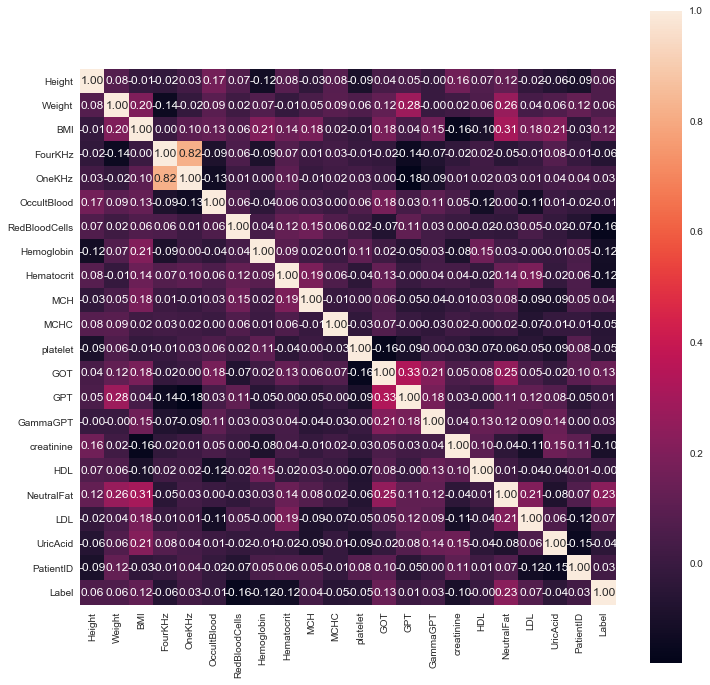

In [42]:
# Analysis of correlation in the dataset. 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Collect the columns
cols = list(dfc2.columns)

cm = np.corrcoef(dfc2[cols].values.T)
plt.figure(figsize=(12,12))
sns.set(font_scale=1.0)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',yticklabels=cols,
                xticklabels=cols)

- A quick glance revelas that the most correlated features are 'OneKHz' and  
  'FourKhz'. Although, a correlation of 0.82 is not too high, we remove one  
  of them. 

In [44]:
# Deleting 'FourKHz'
dfc2 = dfc2.drop('FourKHz',axis=1)

In [49]:
# Check for the need of sampling(up or down)

dfc2['Label'].value_counts()

0.0    457
2.0    220
3.0    178
1.0    141
Name: Label, dtype: int64

As each class has non-negligible percentage of data, there does not seem to be a  
need for resampling. 

In [65]:
# Split data into training and test. 

from sklearn.model_selection import train_test_split

X = dfc2.iloc[:,0:20]
Y = dfc2['Label']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,
                                                    random_state=1)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


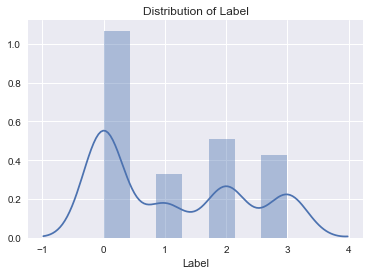

In [67]:
# Consider the distribution of Label
plt.title("Distribution of Label")
plt.xlabel("Label")
sns.distplot(Y_train)

**Classification**:  
- To classify the data, we start with linear SVM.  
- This is because it optimzes the margin which in case of  
   health data can be important for it would clearly distinguish  
   those with a disease and those without. 

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf = Pipeline([
           ("scaler", StandardScaler()),
           ("linear_svc",LinearSVC(C=1,loss="hinge", max_iter=20000)),
           ])
svm_clf.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=20000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [79]:
print("Training score", svm_clf.score(X_train,Y_train))
print("Test score", svm_clf.score(X_test,Y_test))

Training score 0.4648241206030151
Test score 0.44


In [87]:
# The accuracy is lower than 50%.
# However, lets try compute other metrics

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
# Predict labels for training and test data. 
Y_t = svm_clf.predict(X_train)
Y_pred = svm_clf.predict(X_test)

# Compute the metrics. 
print('Precision for training: %.3f ' % precision_score(Y_train,Y_t, average='micro'))
print('Recall for training: %.3f' %recall_score(Y_train,Y_t,average='micro'))
print('Precision for test: %.3f ' % precision_score(Y_test,Y_pred,average='micro'))
print('Recall for test: %.3f' %recall_score(Y_test,Y_pred,average='micro'))

Precision for training: 0.465 
Recall for training: 0.465
Precision for test: 0.440 
Recall for test: 0.440


- We are getting equal Precision and Recall for training and for test data.  
- However, the training and test are much more consistent with 'micro'  
  than with 'macro' which does not respect class imbalances. 

In [92]:
# Predict labels for training and test data. 
Y_trrbf = svm_clf.predict(X_train)
Y_tsrbf = svm_clf.predict(X_test)

# Compute the metrics. 
print('Precision for training: %.3f ' % precision_score(Y_train,Y_trrbf, average='micro'))
print('Precision for test: %.3f ' % precision_score(Y_test,Y_tsrbf,average='micro'))
print('Recall for training: %.3f' %recall_score(Y_train,Y_trrbf,average='micro'))
print('Recall for test: %.3f' %recall_score(Y_test,Y_tsrbf,average='micro'))

Precision for training: 0.465 
Precision for test: 0.440 
Recall for training: 0.465
Recall for test: 0.440


In [116]:
# The linear boundary condition of Linear SVM is too restrictive. 
# So, we try non-linear SVM methods. 

# Below data is modeled on SVM with a 3rd degree Polynomial kernel.

svm_poly = Pipeline([
           ("scaler", StandardScaler()),
           ("svm_clf",SVC(kernel="poly",degree=2,coef0=1,C=0.82)),
           ])
# Fit the dataset. 
svm_poly.fit(X_train,Y_train)

Y_trpol = svm_poly.predict(X_train)
Y_tspol = svm_poly.predict(X_test)

print("Training score", svm_poly.score(X_train,Y_train))
print("Test score", svm_poly.score(X_test,Y_test))
#print('Precision for training: %.3f ' % precision_score(Y_train,Y_trpol, average='micro'))
#print('Precision for test: %.3f ' % precision_score(Y_test,Y_tspol,average='micro'))
print('Recall for training: %.3f' %recall_score(Y_train,Y_trpol,average='micro'))
print('Recall for test: %.3f' %recall_score(Y_test,Y_tspol,average='micro'))

Training score 0.6080402010050251
Test score 0.525
Recall for training: 0.608
Recall for test: 0.525


- Note that the precision and recall scores here are equal due to 'micro'. 

- Although the SVM with polynomial kernel has improved performance, consdiering  
  the possible bias in the data and the nonlinear structure, below the data  
  is fitted with boosting techniques. 

In [152]:
# Gradient boosted trees. 

# The algorithm is here implemented with Staged_predict to get the right
# number of trees. 

from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(max_depth=2,n_estimators=200)
gbrt.fit(X_train,Y_train)

sc = [recall_score(Y_test,Y_p,average='micro') for Y_p in gbrt.staged_predict(X_test)]
bst = np.argmax(sc)

gbrt_b = GradientBoostingClassifier(max_depth=2,n_estimators=bst)
gbrt_b.fit(X_train,Y_train)

Y_trg = gbrt_b.predict(X_train)
Y_tsg = gbrt_b.predict(X_test)

print("Recall for training: %.3f" %recall_score(Y_train,Y_trg,average='micro'))
print("Recall for test: %.3f" %recall_score(Y_test,Y_tsg,average='micro'))

Recall for training: 0.791
Recall for test: 0.495


In [173]:
# Feature importance in GBRT model. 

# Build the colums
col = dfc2.columns

# Function to calculate feature importance. 

def feat_imp(data):
    feature = {} # A hash map to store name and feature
    sc = []  # Array to store scores. 
    for name, score in zip(dfc2[col], gbrt_b.feature_importances_):
        print(name,round(score*100,2))

In [174]:
feat_imp(dfc2)

Height 7.07
Weight 3.98
BMI 5.74
OneKHz 0.14
OccultBlood 0.14
RedBloodCells 7.72
Hemoglobin 7.58
Hematocrit 7.95
MCH 2.48
MCHC 4.77
platelet 3.3
GOT 3.19
GPT 2.7
GammaGPT 3.07
creatinine 4.53
HDL 3.57
NeutralFat 15.62
LDL 5.4
UricAcid 0.65
PatientID 10.4


# 3. Conclusion.

- The analysis above is heavily dependent on filling missing data with MICE.
- In particular, we assumed Missing at Random for the missing values. 
- Moreover, many columns with very little data were removed. 

- The data above was modeled on Linear SVM, Nonliner SVM with Gaussian and
  Polynomial kernel and Gradient Boosted trees. 
- Our analysis show that SVM with polynomial kernel performs the best with a
  recall score of 0.525 with Boosted trees' score clost to it at 0.495.
- From the Gradient boosted treest, it turns out that the most important
  features are 'NeutralFat', 'Hmeatorcrit' and 'Hemoglobin'. 

In [141]:
# Plotting feature importance. 

plot_importance(ada)
pyplot.show()

NameError: name 'plot_importance' is not defined

In [142]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train,Y_train)

s = xg.predict(X_test)
print()

ModuleNotFoundError: No module named 'xgboost'